In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define weights for converting a 3-bit binary pattern to a decimal number
weights = np.array([4, 2, 1])

In [2]:
# Compute next state of the cellular automaton based on current state
def step(x, rule_b):
    
    # Get the left, center, and right neighbors of each cell
    left = np.roll(x, 1)
    center = x
    right = np.roll(x, -1)
    
    # Convert the 3-bit neighborhood into a decimal number (0-7)
    neighborhood = left * weights[0] + center * weights[1] + right * weights[2]
    
    # Use the rule array to determine the new state
    return rule_b[7 - neighborhood]

In [3]:
# Generate cellular automaton over multiple time steps
def generate(rule, size = 100, steps = 100):
    
    # Convert rule number (0-255) into an 8-bit binary array
    rule_b = np.array([int(b) for b in np.binary_repr(rule, 8)], dtype = np.int8)
    
    # Initialize the grid (steps x size) with zeros
    x = np.zeros((steps, size), dtype = np.int8)
    
    # Set the first row with random 0s and 1s
    x[0, :] = np.random.rand(size) < 0.5
    
    # Iterate through time steps to update the state
    for i in range(steps - 1):
        x[i + 1, :] = step(x[i, :], rule_b)
    
    return x

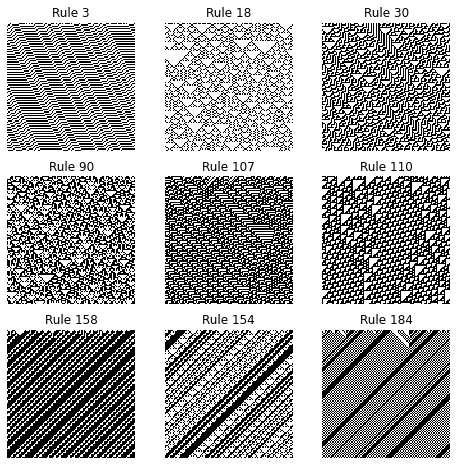

In [4]:
# Set up the figure for displaying multiple cellular automata
fig, axes = plt.subplots(3, 3, figsize = (8, 8))

# List of rules to visualize -> modify for different rules
rules = [3, 18, 30, 90, 107, 110, 158, 154, 184]

# Generate and display each rule's evolution
for ax, rule in zip(axes.flat, rules):
    x = generate(rule)
    ax.imshow(x, cmap = "binary", interpolation = "none")
    ax.set_axis_off()
    ax.set_title(f"Rule {rule}")